In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import sys, time, os, warnings 
import numpy as np
import pandas as pd 

In [2]:
### Images from one directory
dir_jpg = "./1/"

jpgs = os.listdir(dir_jpg)
print("The number of jpg flies in folder: {}".format(len(jpgs)))

The number of jpg flies in folder: 2339


In [3]:
### Original description file
text = pd.read_csv('clothing_1w_1.csv')
text.head(10)

,item_id,description,category,keywords,desc
0,dNmGtAFUen,['简单 的 黑白 撞色 让 这件 雪纺衫 更为 时尚 耐看 ， 穿着 中 凸显 干练 ， ...,服饰,尚 都 比拉 撞色 雪纺 衬衫 女 2019 夏季 女装 新品 领 拼接 衬衣 落肩 短袖 ...,简单的黑白撞色让这件雪纺衫更为时尚耐看，穿着中凸显干练，加以时尚的小巧的翻领结合V领的设计，...
1,5vrInEfCB4,['简约 的 连衣裙 ， 都 可以 轻松 驾驭 。 蕾丝 拼接 的 设计 ， 打破 了 单调...,服饰,法曼丽 蕾丝 小 翻领 拼接 连衣裙 秋 2018 新款 收腰 中长 字 裙 女 黑色 ， ...,简约的连衣裙，都可以轻松驾驭。蕾丝拼接的设计，打破了单调的沉闷，多了几分时尚的少女感，很是减...
2,nlvEUQXwWd,['采用 了 螺纹 领口 的 设计 ， 舒适 又 大方 ， 不 容易 变形 。 正面 使用 ...,服饰,天龙 致尊 短袖 T恤 2019 新品 萌潮 星空 猪 印花 卡通 潮牌 涂鸦 创意 情侣 ...,采用了螺纹领口的设计，舒适又大方，不容易变形。正面使用了星空猪猪的印花图案，显得非常的萌萌哒...
3,TWsq5jp47u,['蓝白 竖 条纹 的 面料 ， 清新 亮眼 ， 带有 浓浓的 夏日 风情 。 宽松 的 版...,服饰,夏季 新品 女式 宽松 休闲 蓝白 条纹 印花 海军 风 棉麻 短袖 连衣裙 天蓝色 36 ...,蓝白竖条纹的面料，清新亮眼，带有浓浓的夏日风情。宽松的版型，带来慵懒和休闲的味道。袖口和领口...
4,1MfiAzCw1i,['细细的 黑白 格子 时尚 大气 ， 圆领 无袖 的 款式 简洁 大方 ， 里面 搭件 基...,服饰,颜域 品牌女装 2018 新款 格纹 拼接 流苏 毛边 背心 裙中 长款 连衣裙 冬 黑白 ...,细细的黑白格子时尚大气，圆领无袖的款式简洁大方，里面搭件基础的针织衫就很好看，胸部立体剪裁衬...
5,1I9krWHhML,['一款 凸显 气质 的 半身裙 套装 ， 复古 的 门襟 纽扣 搭配 方领 设计 ， 尽显...,服饰,烟花 烫 2017 秋 新款 女装 气质 绣花 收腰 上衣 半身裙 套装 枕香成 梦 粉 紫...,一款凸显气质的半身裙套装，复古的门襟纽扣搭配方领设计，尽显迷人锁骨，胸前精致的花朵刺绣，更显...
6,MAMoDLLyLj,['谁 说 时尚 就 得 所有 流行 元素 都 往 衣服 上堆 ？ 这 款 T恤 虽然 版型...,服饰,男装 短袖 T恤 白底 灰色 字母 901 ， 短袖 ， 青春 流行 ， 圆领 ， 棉 ， ...,谁说时尚就得所有流行元素都往衣服上堆？ 这款T恤虽然版型简约，但前襟别具一格的字母印花，由几...
7,NHJ7sMy41g,['整体 纯色 的 百褶 设计 ， 简约 而 不 美感 ； 新颖 的 撞色 条纹 织带 设计...,服饰,2018 夏季 新款 半身裙 女 休闲 个性 不 对称 纯色 百褶裙 裙子 女 482204...,整体纯色的百褶设计，简约而不美感； 新颖的撞色条纹织带设计，吸睛更显时尚； 单边的压褶效果，...
8,MoS5GLZr64,['深蓝 与 浅蓝 的 撞色 搭配 ， 打破 无 风格 的 暗沉 。 中间 的 白条 ， 自...,服饰,森马 毛衣 男 冬季 男士 韩版 潮流 圆领 针织衫 学生 14077071137 蓝色 调...,深蓝与浅蓝的撞色搭配，打破无风格的暗沉。中间的白条，自然的过渡了两种蓝色，时尚不违和。袖口罗...
9,D2WVaSXtey,['经典 POLO 领 设计 ， 百搭之余 又 多 了 几分 稳重 干练 的 气质 。 修身...,服饰,温网 系列 哈 吉斯 夏装 新款 T恤衫 男 时尚 纯色 短袖 衫 白色 185 52 ， ...,经典POLO领设计，百搭之余又多了几分稳重干练的气质。修身版型凸显身材，彰显出挺拔阳刚的型男...


In [4]:
### Add a suffix for item name then the images will match our description
item_id = text['item_id']
item = [i + '.jpg' for i in item_id]
image = [i for i in jpgs if i in item]

In [5]:
### Create a new description file
new_text = text.copy()
new_text.item_id = item
new_text.head(10)

,item_id,description,category,keywords,desc
0,dNmGtAFUen.jpg,['简单 的 黑白 撞色 让 这件 雪纺衫 更为 时尚 耐看 ， 穿着 中 凸显 干练 ， ...,服饰,尚 都 比拉 撞色 雪纺 衬衫 女 2019 夏季 女装 新品 领 拼接 衬衣 落肩 短袖 ...,简单的黑白撞色让这件雪纺衫更为时尚耐看，穿着中凸显干练，加以时尚的小巧的翻领结合V领的设计，...
1,5vrInEfCB4.jpg,['简约 的 连衣裙 ， 都 可以 轻松 驾驭 。 蕾丝 拼接 的 设计 ， 打破 了 单调...,服饰,法曼丽 蕾丝 小 翻领 拼接 连衣裙 秋 2018 新款 收腰 中长 字 裙 女 黑色 ， ...,简约的连衣裙，都可以轻松驾驭。蕾丝拼接的设计，打破了单调的沉闷，多了几分时尚的少女感，很是减...
2,nlvEUQXwWd.jpg,['采用 了 螺纹 领口 的 设计 ， 舒适 又 大方 ， 不 容易 变形 。 正面 使用 ...,服饰,天龙 致尊 短袖 T恤 2019 新品 萌潮 星空 猪 印花 卡通 潮牌 涂鸦 创意 情侣 ...,采用了螺纹领口的设计，舒适又大方，不容易变形。正面使用了星空猪猪的印花图案，显得非常的萌萌哒...
3,TWsq5jp47u.jpg,['蓝白 竖 条纹 的 面料 ， 清新 亮眼 ， 带有 浓浓的 夏日 风情 。 宽松 的 版...,服饰,夏季 新品 女式 宽松 休闲 蓝白 条纹 印花 海军 风 棉麻 短袖 连衣裙 天蓝色 36 ...,蓝白竖条纹的面料，清新亮眼，带有浓浓的夏日风情。宽松的版型，带来慵懒和休闲的味道。袖口和领口...
4,1MfiAzCw1i.jpg,['细细的 黑白 格子 时尚 大气 ， 圆领 无袖 的 款式 简洁 大方 ， 里面 搭件 基...,服饰,颜域 品牌女装 2018 新款 格纹 拼接 流苏 毛边 背心 裙中 长款 连衣裙 冬 黑白 ...,细细的黑白格子时尚大气，圆领无袖的款式简洁大方，里面搭件基础的针织衫就很好看，胸部立体剪裁衬...
5,1I9krWHhML.jpg,['一款 凸显 气质 的 半身裙 套装 ， 复古 的 门襟 纽扣 搭配 方领 设计 ， 尽显...,服饰,烟花 烫 2017 秋 新款 女装 气质 绣花 收腰 上衣 半身裙 套装 枕香成 梦 粉 紫...,一款凸显气质的半身裙套装，复古的门襟纽扣搭配方领设计，尽显迷人锁骨，胸前精致的花朵刺绣，更显...
6,MAMoDLLyLj.jpg,['谁 说 时尚 就 得 所有 流行 元素 都 往 衣服 上堆 ？ 这 款 T恤 虽然 版型...,服饰,男装 短袖 T恤 白底 灰色 字母 901 ， 短袖 ， 青春 流行 ， 圆领 ， 棉 ， ...,谁说时尚就得所有流行元素都往衣服上堆？ 这款T恤虽然版型简约，但前襟别具一格的字母印花，由几...
7,NHJ7sMy41g.jpg,['整体 纯色 的 百褶 设计 ， 简约 而 不 美感 ； 新颖 的 撞色 条纹 织带 设计...,服饰,2018 夏季 新款 半身裙 女 休闲 个性 不 对称 纯色 百褶裙 裙子 女 482204...,整体纯色的百褶设计，简约而不美感； 新颖的撞色条纹织带设计，吸睛更显时尚； 单边的压褶效果，...
8,MoS5GLZr64.jpg,['深蓝 与 浅蓝 的 撞色 搭配 ， 打破 无 风格 的 暗沉 。 中间 的 白条 ， 自...,服饰,森马 毛衣 男 冬季 男士 韩版 潮流 圆领 针织衫 学生 14077071137 蓝色 调...,深蓝与浅蓝的撞色搭配，打破无风格的暗沉。中间的白条，自然的过渡了两种蓝色，时尚不违和。袖口罗...
9,D2WVaSXtey.jpg,['经典 POLO 领 设计 ， 百搭之余 又 多 了 几分 稳重 干练 的 气质 。 修身...,服饰,温网 系列 哈 吉斯 夏装 新款 T恤衫 男 时尚 纯色 短袖 衫 白色 185 52 ， ...,经典POLO领设计，百搭之余又多了几分稳重干练的气质。修身版型凸显身材，彰显出挺拔阳刚的型男...


In [6]:
### Combine the images and descriptions
file = []
desc = []
for i in range(0, 10000):
    if new_text.iloc[i]['item_id'] in image:
        file.append(new_text.iloc[i]['item_id'])
        desc.append(new_text.iloc[i]['desc'])
data = pd.DataFrame(list(zip(file, desc)), columns =['item', 'desc'])
data.head(10)

,item,desc
0,5vrInEfCB4.jpg,简约的连衣裙，都可以轻松驾驭。蕾丝拼接的设计，打破了单调的沉闷，多了几分时尚的少女感，很是减...
1,1MfiAzCw1i.jpg,细细的黑白格子时尚大气，圆领无袖的款式简洁大方，里面搭件基础的针织衫就很好看，胸部立体剪裁衬...
2,1I9krWHhML.jpg,一款凸显气质的半身裙套装，复古的门襟纽扣搭配方领设计，尽显迷人锁骨，胸前精致的花朵刺绣，更显...
3,B4GjMsdcHb.jpg,利用柔软针织面料打造的长袖T恤，穿着富有弹力非常舒适。在领口增加了撞色波浪边的点缀，和荷叶边...
4,AiQy7bshqG.jpg,这款是才子的修身羊毛毛呢商务西服，含有羊毛材质会更具保暖特性，打理起来也很好打理，优质版型设...
5,6mzYyB1Dd6.jpg,OVB火焰笑脸印花T恤，采用个性的火焰元素笑脸印花设计，别致美观，彰显男士青春活力气息，简约...
6,bs4hnOM1pE.jpg,深蓝色的polo衫彰显沉稳气质，同时又不会过于沉闷； 胸前的袖标图案有着英式的细致典雅，不经...
7,8abnq5uCFb.jpg,选用聚酯纤维材质的面料，具有较高的强度与弹性恢复能力，穿着舒适经久耐穿； 简约的立领的设计，...
8,983CvVuXDV.jpg,撞色领带设计与衣身形成强烈对比，白蓝色既优雅又清纯，巧妙的凸显出职场女性的个性和精神面貌； ...
9,db6G7RXBDI.jpg,一款文艺气息十足的格子连衣裙，松紧的腰身，提升腰线，收拢腰身，勾勒曼妙身姿，方领修饰颈部曲线...


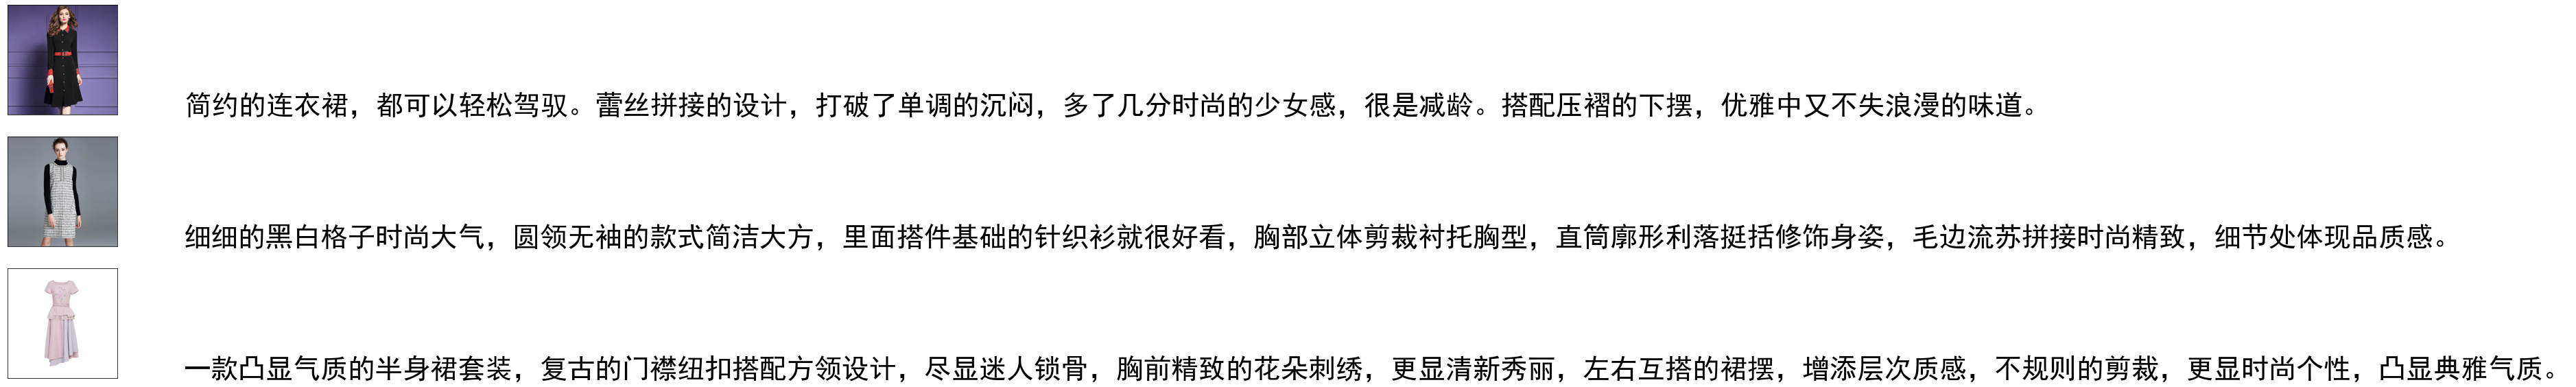

In [29]:
### Take an example look
plt.rcParams['font.sans-serif'] = ['SimHei']

fig = plt.figure(figsize=(10,10))
count = 1
for name in file[:3]:
    filename = dir_jpg + name
    image_load = tf.keras.preprocessing.image.load_img(filename)
    captions = list(data['desc'].loc[data['item']==name])
    ax = fig.add_subplot(3,2,count,xticks=[],yticks=[])
    ax.imshow(image_load)
    count += 1
    
    ax = fig.add_subplot(3,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,len(captions))
    for i, caption in enumerate(captions):
        ax.text(0,i,caption,fontsize=40)
    count += 1
plt.show()